In [102]:
import os
import re
import h5py
import numpy as np
import pandas as pd
import scipy.io

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import utils

datadir = '../datasets/NNN/'
fnames = utils.fnames(datadir)
data = pd.read_pickle('../datasets/NNN/all_session_data.pkl')

unit types: 456
psth: (456, 450)
avg firing rate to all images: (456, 1072)
number of single units: 30


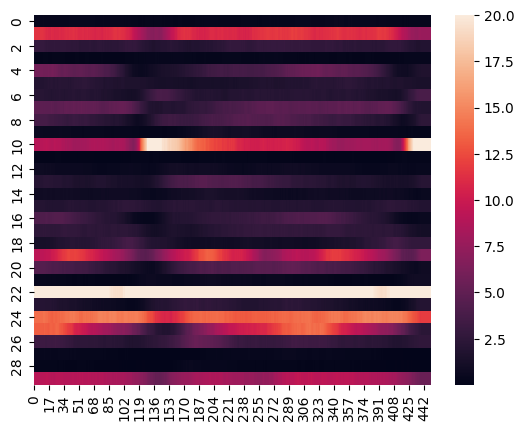

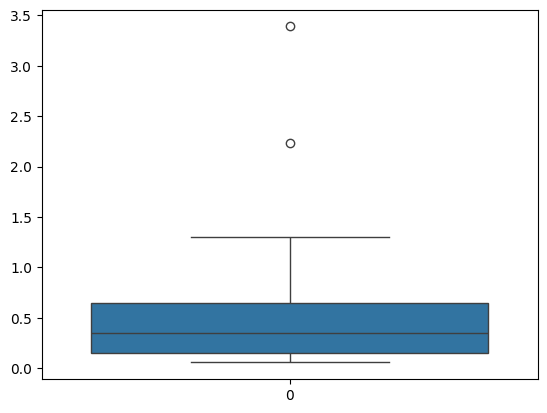

In [39]:
for i, pair in enumerate(fnames):
    if i>0:
        break
    gus_fname = os.path.join(datadir, pair[0])
    proc_fname = os.path.join(datadir, pair[1])
    
    gus_data = utils.load_mat(gus_fname)
    proc_data = scipy.io.loadmat(proc_fname)
    
    print('unit types:', len(proc_data['UnitType'][0]))
    print('psth:', proc_data['mean_psth'].shape)
    print('avg firing rate to all images:', proc_data['response_basic'].shape)
    
    mean_psth = proc_data['mean_psth']
    unit_type = proc_data['UnitType'][0]
    single_units = np.where(unit_type==1)
    snr = proc_data['snr'].T
    response = np.stack(gus_data['GoodUnitStrc']['response_matrix_img'])
    
    print(f'number of single units: {np.sum(unit_type==1)}')
    
    sns.heatmap(mean_psth[single_units], vmax=20)
    plt.show()
    
    sns.boxplot(snr[single_units])
    plt.show()

In [138]:
rows = []
for i, row in df.iterrows():
    session = row['session']
    unit_snr_arr = np.array(row['snr']).flatten()  # snr array for this session/file
    for snr_val in unit_snr_arr:
        rows.append({
            'session': session,
            'snr': snr_val
        })
df_per_unit = pd.DataFrame(rows)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()